#  📈 Retail Sales Exploratory Data Analysis📊

## Problem Statement

Retail businesses generate large volumes of transactional data, but understanding customer purchasing behavior, product performance, and sales trends is essential for making data-driven decisions. This analysis aims to explore retail sales data to identify revenue drivers, customer spending patterns, category performance, and seasonal trends that can support strategic business decisions.

## Objective

- Analyze customer purchasing behavior and spending patterns.
- Identify high-revenue product categories (Beauty, Clothing, Electronics).
- Understand seasonal sales trends and monthly performance.
- Segment customers based on spending levels.
- Provide actionable business insights to improve sales strategy.

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [161]:
df=pd.read_csv("retail_sales_dataset.csv",encoding="latin1")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [162]:
df.shape

(1000, 9)

### Data Overview

In [163]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [164]:
df.duplicated().sum()

np.int64(0)

"There are no duplicates in the dataset."

In [165]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [166]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

There are no Null values in the Dataset

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [168]:
df["Date"]=pd.to_datetime(df["Date"],errors="coerce")

In [169]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

Converted The Date column to Datetime Type

In [170]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Checking if there is any Null values after conveting Dates to Datetime

In [171]:
# Cleaning Column Names
df.columns = df.columns.str.strip().str.replace(" ", "_", regex=False)

In [172]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')

Column Names are cleaned Successfully

In [173]:
df["Month"]=df["Date"].dt.month_name()
print(df["Month"])

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object


## DATA ANALYSIS

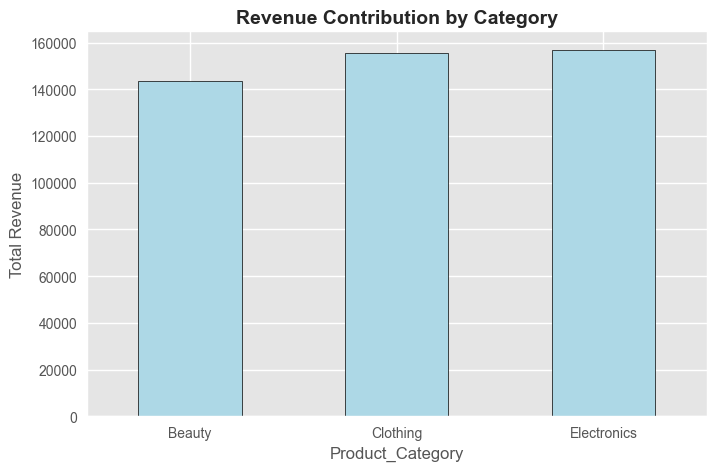

In [174]:
category_revenue = df.groupby('Product_Category')['Total_Amount'].sum()
category_revenue.sort_values().plot(kind='bar', figsize=(8,5), color='lightblue', edgecolor='black')
plt.title('Revenue Contribution by Category', fontsize=14,weight="bold")
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

### **Category Revenue Performance**
- Electronics generates the highest revenue.
- Clothing revenue is slightly lower than Electronics.
- Beauty contributes the least revenue.
- All categories show relatively balanced revenue contribution.
- “This suggests **Electronics** and **Clothing** are key revenue drivers, while **Beauty** has growth potential.”

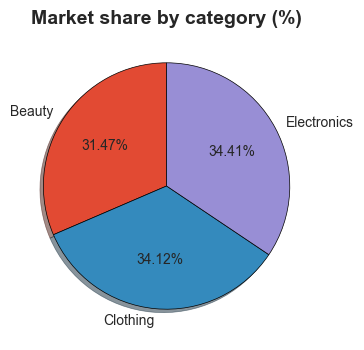

In [175]:
category_revenue = df.groupby("Product_Category")["Total_Amount"].sum()
category_percent = (category_revenue / category_revenue.sum()) * 100
plt.figure(figsize=(4,4))
plt.pie(category_percent,labels=category_percent.index,shadow=True, startangle=90, wedgeprops={"edgecolor" : "black"}, autopct="%1.2f%%")
plt.title("Market share by category (%)",fontsize="14",weight="bold")
plt.show()

**Market Share**
- **Electronics** holds the highest market share at **34.41%**.
- **Clothing** closely follows with **34.12%** share.
- **Beauty** contributes **31.47%**, slightly lower than the others.
- Overall market share distribution remains fairly balanced.
- Electronics and Clothing seem to bring the most business, showing strong customer interest in these categories. Beauty is slightly behind but still important, and with the right promotions or focus, it could grow further.

In [176]:
category_gender_spending=df.groupby(["Product_Category","Gender"])["Total_Amount"].sum().unstack()
print(category_gender_spending)

Gender            Female   Male
Product_Category               
Beauty             74830  68685
Clothing           81275  74305
Electronics        76735  80170


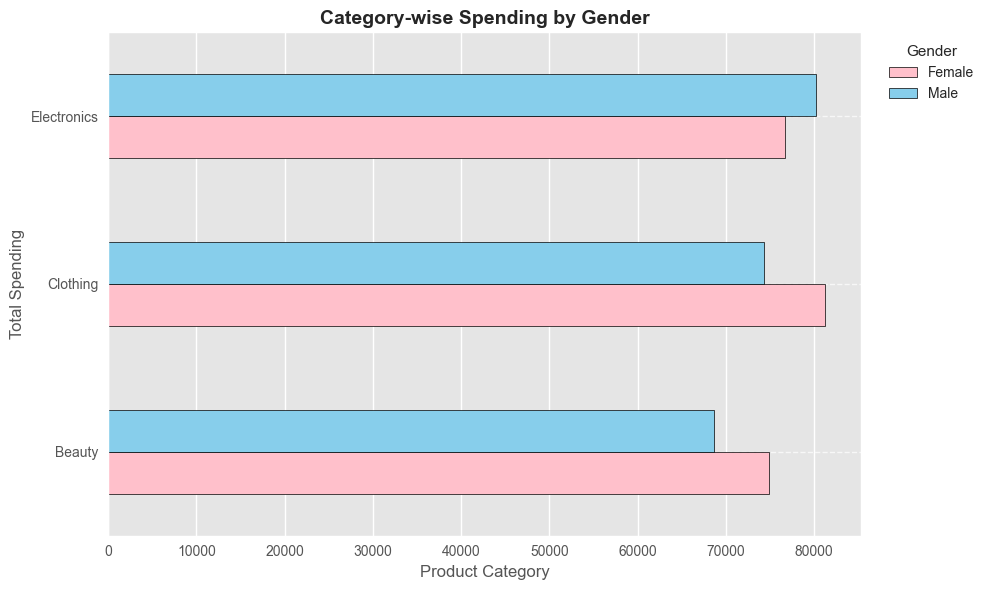

In [177]:
category_gender_spending.plot(kind="barh",figsize=(10,6),edgecolor="black",color=["pink","skyblue"])
plt.title("Category-wise Spending by Gender",fontsize=14,weight="bold")
plt.xlabel("Product Category",fontsize=12)
plt.ylabel("Total Spending",fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Gender", bbox_to_anchor=(1.02, 1), loc="upper left",fontsize=10,title_fontsize=11)
plt.grid(alpha=0.7,axis="y",ls="--")
plt.tight_layout()
plt.show()

**Gender vs Category Preference**
- **Females** spend about **₹75K** on **Beauty** vs **males** around **₹69K**.
- **Clothing** shows highest **female** spending **(~₹81K)** compared to **males** **(~₹74K)**.
- In **Electronics**, **males** spend slightly more **(~₹80K)** than **females (~₹77K)**.
- Overall spending from both genders remains relatively balanced.
- This suggests the company can attract more **female** customers through **fashion and personal care promotions**, while targeting **male customers with electronics offers and technology-focused marketing campaigns**.

In [178]:
df["Age_Group"] = pd.cut(df["Age"],bins=[18, 25, 40, 60, 100],labels=["18-25", "26-40", "41-60", "60+"])
df["Age_Group"].value_counts()

Age_Group
41-60    441
26-40    297
18-25    148
60+       93
Name: count, dtype: int64

In [179]:
category_Age = df.groupby(["Age_Group", "Product_Category"])["Total_Amount"].sum().unstack()

C:\Users\ashis\AppData\Local\Temp\ipykernel_5476\2103105170.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_Age = df.groupby(["Age_Group", "Product_Category"])["Total_Amount"].sum().unstack()


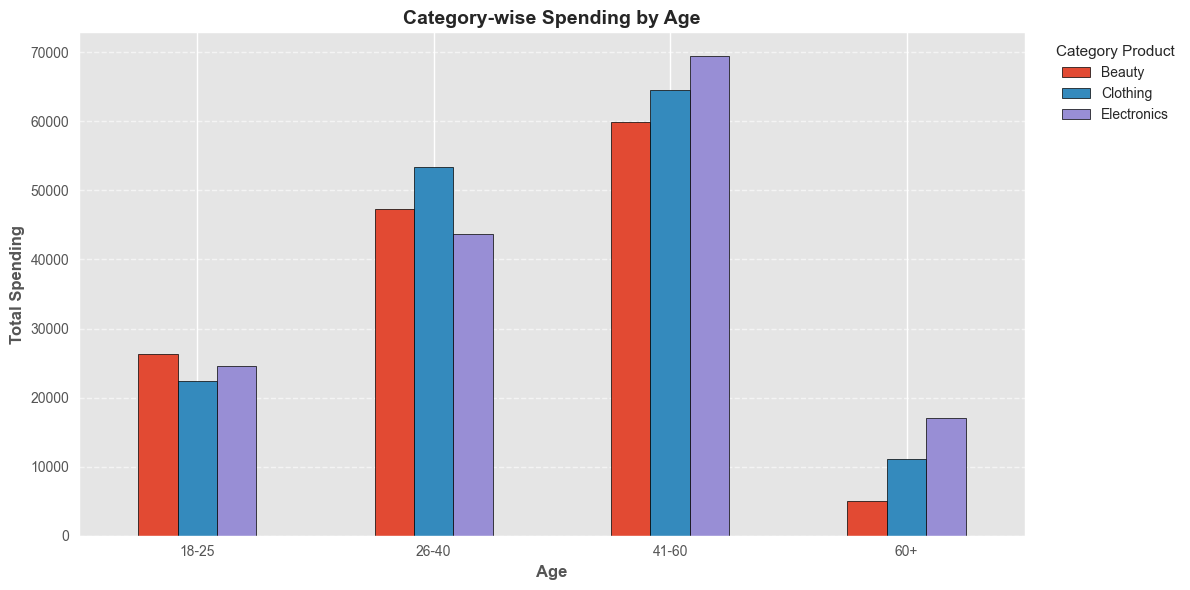

In [180]:
category_Age.plot(kind="bar",figsize=(12,6),edgecolor="black")
plt.title("Category-wise Spending by Age",fontsize=14,weight="bold")
plt.xlabel("Age",fontsize=12,weight="bold")
plt.ylabel("Total Spending",fontsize=12,weight="bold")
plt.legend(title="Category Product", bbox_to_anchor=(1.02, 1), loc="upper left",fontsize=10,title_fontsize=11)
plt.grid(axis="y",linestyle="--",alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Age Group Spending Patterns**
- Customers aged 41–60 show the highest spending across all categories.
- The 26–40 age group also contributes strong and consistent spending.
- Younger customers spend moderately.
- Seniors (60+) spend the least, particularly in Beauty.
- This indicates middle-aged customers are the main revenue drivers. Businesses should focus marketing and promotions on this segment while encouraging younger and senior customers through targeted offers.

In [181]:
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
df["Month"] = pd.Categorical(df["Month"],categories=month_order,ordered=True)

In [182]:
sales_month=df.groupby(["Month"])["Total_Amount"].sum()
print(sales_month)

Month
January      36980
February     44060
March        28990
April        33870
May          53150
June         36715
July         35465
August       36960
September    23620
October      46580
November     34920
December     44690
Name: Total_Amount, dtype: int64


C:\Users\ashis\AppData\Local\Temp\ipykernel_5476\3418413960.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_month=df.groupby(["Month"])["Total_Amount"].sum()


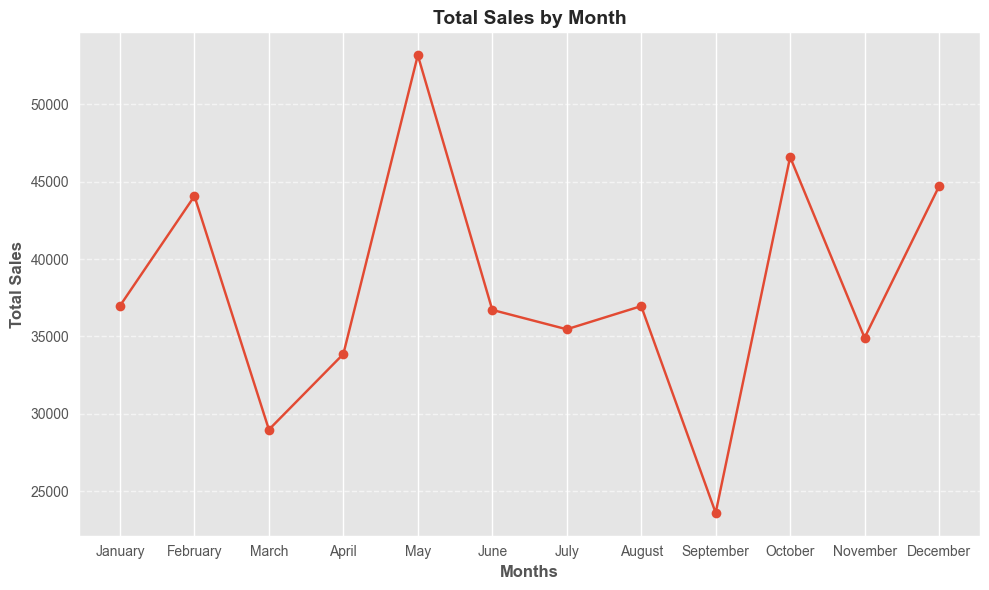

In [183]:
sales_month.plot(kind="line",figsize=(10,6),marker="o")
plt.title("Total Sales by Month",fontsize=14,weight="bold")
plt.xlabel("Months",fontsize=12,weight="bold")
plt.ylabel("Total Sales",fontsize=12,weight="bold")
plt.grid(axis="y",linestyle="--",alpha=0.6)
plt.xticks(range(len(sales_month.index)), sales_month.index)
plt.tight_layout()
plt.show()

**Sales Over Time analysis**
- The graph shows how total sales vary month by month.
- Sales peak around **May**, indicating a strong demand period.
- **September** shows the **lowest sales**, suggesting a slower business phase.
- Overall, sales fluctuate throughout the year rather than remaining constant.
- Sales show a seasonal pattern, with higher demand around May and lower sales around September. Businesses can maximize revenue by focusing promotions during peak months and using targeted offers in slower periods to maintain steady sales.

In [184]:
category_Month=df.groupby(["Month","Product_Category"])["Total_Amount"].sum().unstack()
print(category_Month)

Product_Category  Beauty  Clothing  Electronics
Month                                          
January            13930     13125         9925
February           14035     14560        15465
March              10545     15065         3380
April              11905     13940         8025
May                12450     17455        23245
June               10995     10170        15550
July               16090      8250        11125
August              9790     12455        14715
September           6320      9975         7325
October            15355     13315        17910
November            9700     15200        10020
December           12400     12070        20220


C:\Users\ashis\AppData\Local\Temp\ipykernel_5476\2554891232.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_Month=df.groupby(["Month","Product_Category"])["Total_Amount"].sum().unstack()


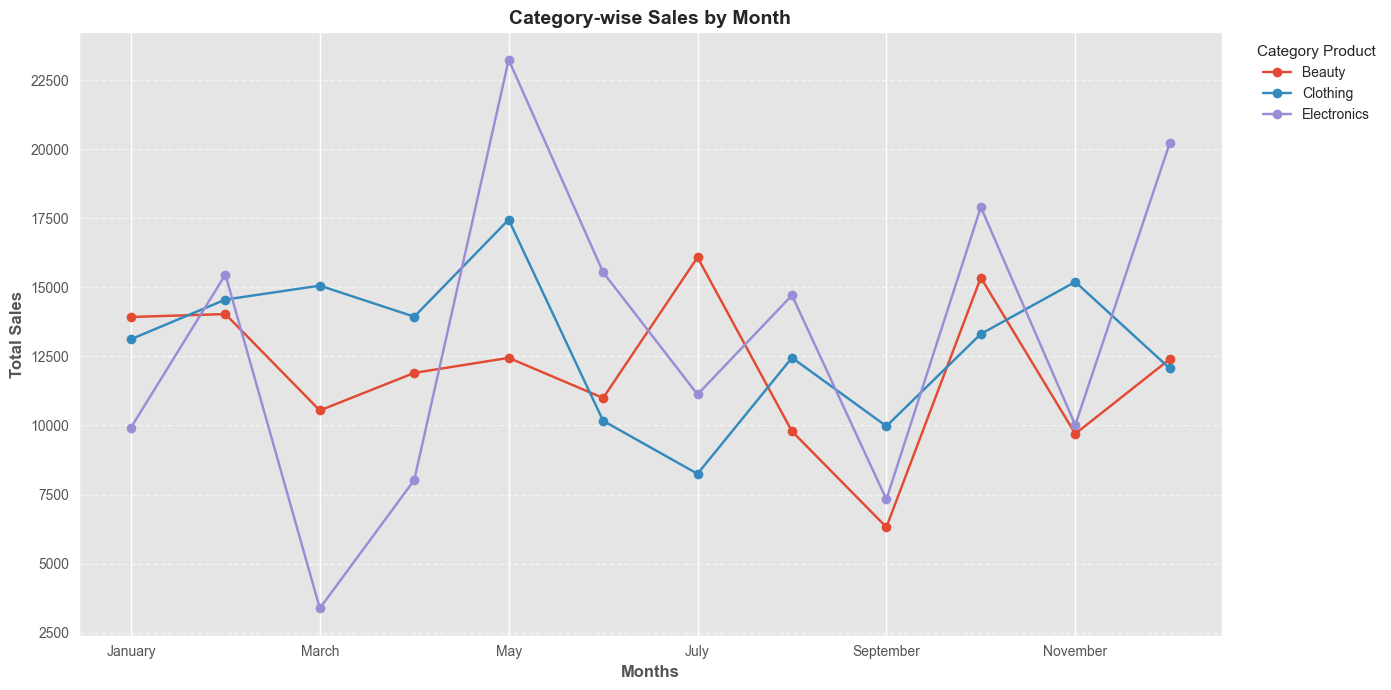

In [185]:
category_Month.plot(kind="line",figsize=(14,7),marker="o")
plt.title("Category-wise Sales by Month",fontsize=14,weight="bold")
plt.xlabel("Months",fontsize=12,weight="bold")
plt.ylabel("Total Sales",fontsize=12,weight="bold")
plt.legend(title="Category Product", bbox_to_anchor=(1.02, 1), loc="upper left",fontsize=10,title_fontsize=11)
plt.grid(axis="y",linestyle="--",alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Seasonal Sales Trends With Category
- **Electronics** peaks around **~23K in May** and **~20K in December**, higher than other categories in those months.
- **Clothing** stays relatively stable (~10K–17K range), showing consistent demand.
- **Beauty** fluctuates moderately (~6K–16K), with noticeable dips around September.
- Overall sales across categories show seasonal variation rather than steady growth.
- Electronics appears to be the strongest revenue-driving category, while Clothing provides stable consistent sales and Beauty shows moderate performance. Businesses can focus marketing and product promotions more on Electronics during peak periods, maintain steady stock for Clothing, and introduce targeted offers to improve Beauty category sales

In [186]:
df['Total_Sales'] = df['Price_per_Unit'] * df['Quantity']
df['Spending_Level'] = pd.qcut(df['Total_Sales'],q=3,labels=['Low Spender', 'Medium Spender', 'High Spender'])
Spender_order = ["Lower Spender","Medium Spender","High Spender"]
df["Spending_Level"] = pd.Categorical(df["Spending_Level"],categories=Spender_order,ordered=True)

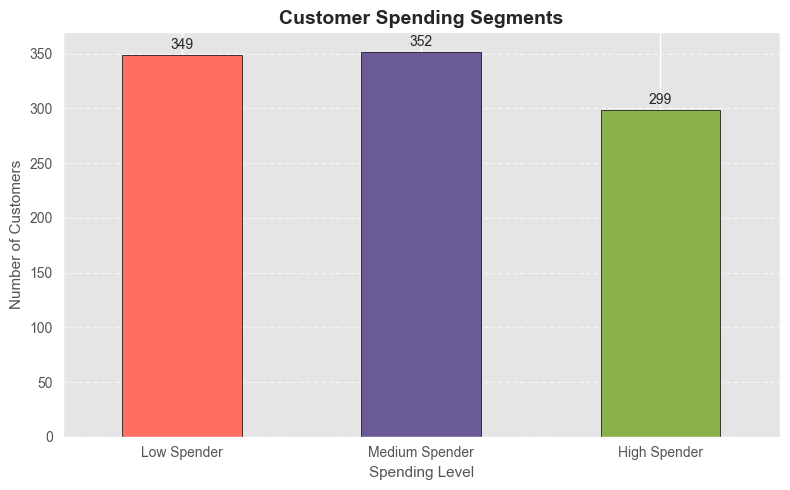

In [187]:
plt.figure(figsize=(8,5))
customer_count.plot(kind='bar',color=['#FF6F61', '#6B5B95', '#88B04B'],edgecolor='black')
for i, v in enumerate(customer_count):
    plt.text(i, v+5, str(v), ha='center', fontsize=10)
plt.title("Customer Spending Segments", fontsize=14, weight='bold')
plt.xlabel("Spending Level", fontsize=11)
plt.ylabel("Number of Customers", fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Customer Spending Segmentation & Revenue Impact
- Most customers fall in the **medium spending group (~352)**, so they bring steady and consistent sales.
- **Low spenders (~349)** are almost the same in number but don’t contribute much revenue individually.
- **High spenders (~299)** are fewer, but they usually generate a bigger share of income.
- High spenders are fewer but bring most of the revenue, while medium spenders provide stable, consistent sales. Low spenders are more in number but contribute less overall. Focus on retaining high spenders with premium benefits and encourage low spenders to increase purchases through targeted offers or loyalty programs.

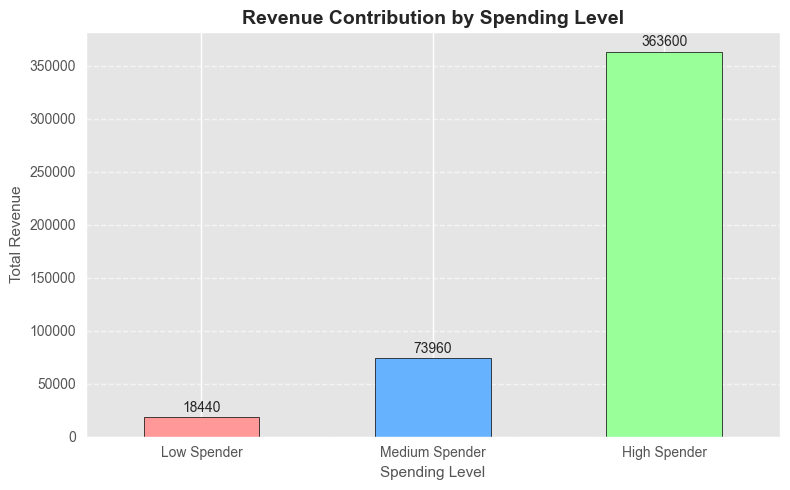

In [188]:
plt.figure(figsize=(8,5))
revenue.plot(kind='bar',color=['#FF9999', '#66B2FF', '#99FF99'],edgecolor='black')
plt.title("Revenue Contribution by Spending Level", fontsize=14, weight='bold')
plt.xlabel("Spending Level", fontsize=11)
plt.ylabel("Total Revenue", fontsize=11)
plt.xticks(rotation=0)
plt.grid(True,axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(revenue):
    plt.text(i, v + 5000, f"{int(v)}", ha='center')
plt.tight_layout()
plt.show()


### Customer Spend vs Revenue Analysis
- **High spenders** generate the majority of revenue (~₹363K), even though they are fewer in number.
- **Medium spenders** (~₹74K) provide steady but moderate revenue contribution.
- **Low spenders** (~₹18K) contribute the least, showing limited individual purchase value.
-  High spenders generate **~20×** more revenue than low spenders
-  The business heavily depends on high-value customers for revenue growth. Retaining these customers through loyalty benefits, personalized offers, and premium experiences is crucial, while targeted promotions can help convert medium and low spenders into higher-value customers.

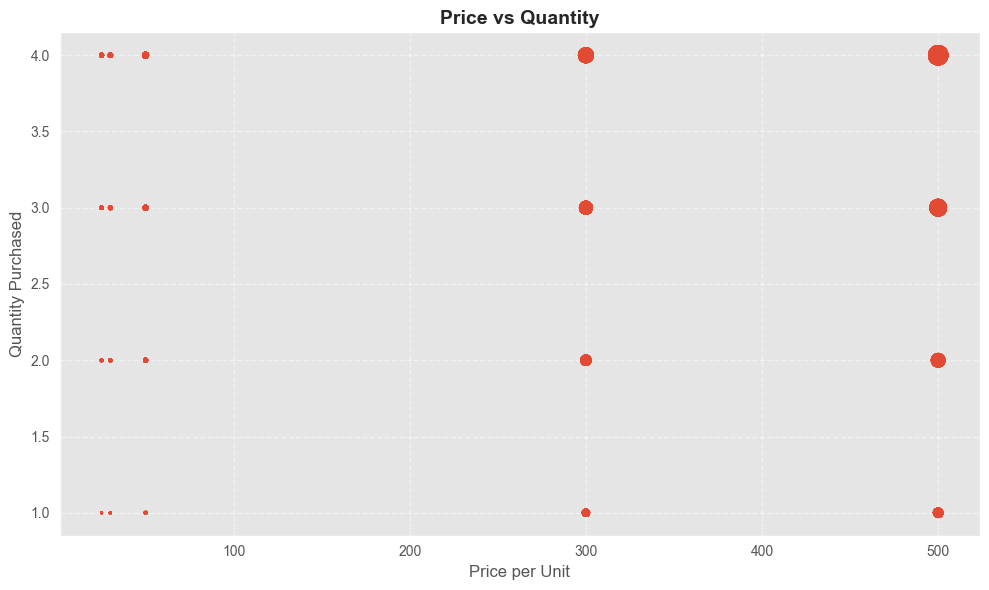

In [189]:
plt.figure(figsize=(10,6))
plt.scatter(df["Price_per_Unit"], df["Quantity"],s=df["Total_Amount"]/10,alpha=0.5)
plt.xlabel("Price per Unit",fontsize=12)
plt.ylabel("Quantity Purchased",fontsize=12)
plt.title("Price vs Quantity",fontsize=14,weight="bold")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### **Price vs Quantity Relationship**
- Premium items (~₹500) still see purchases of up to 4 units.
- Mid-range products (~₹300) maintain steady purchases (1–4 units).
- Budget items (~₹20–₹60) show varied buying patterns (1–3 units).
- Demand exists across all price ranges.
- Customers appear willing to buy both budget and premium products, showing that value perception plays a key role in purchasing decisions. Businesses can adopt a balanced pricing strategy — maintaining affordable options while promoting premium products through branding, quality positioning, and targeted marketing.

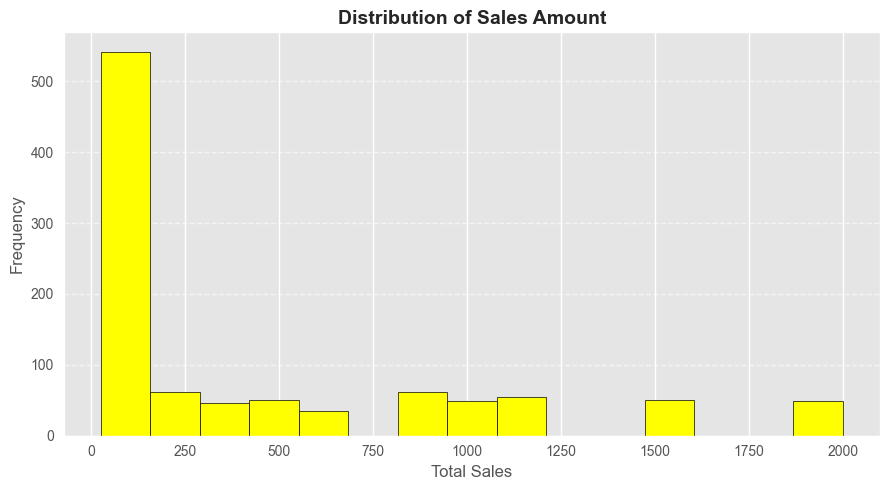

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.hist(df['Total_Sales'], bins=15, color='yellow', edgecolor='black')
plt.title("Distribution of Sales Amount", fontsize=14, weight='bold')
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.grid(True ,axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Sales Amount Distribution Analysis
- Most sales are in the lower price range.
- Few high-value purchases boost overall revenue.
- Sales pattern shows many small, few large transactions.
- Indicates typical retail buying behavior.
- Sales mainly come from frequent small purchases, while a few high-value transactions significantly increase revenue. Businesses should keep affordable options for regular buyers and target premium customers with special offers to maximize profit.

## Final Business Insights
- High-value customers generate a major share of revenue despite being fewer in number.
- Electronics category contributes significantly to overall revenue, while Clothing shows stable demand and Beauty offers growth potential.
- Sales exhibit seasonal variation, indicating opportunities for targeted promotions.
- Most purchases are small to moderate in value, with occasional high-value transactions boosting revenue.
- Customer segmentation highlights opportunities to convert medium and low spenders into higher-value customers.

## Conclusion
This retail sales analysis highlights that business growth is driven not only by customer volume but by customer value and category performance. High-spending customers and premium product segments play a crucial role in revenue generation, while seasonal trends influence purchasing behavior. Focusing on customer retention, strategic promotions, balanced pricing, and category-specific marketing can help improve overall sales performance and long-term business sustainability.